In [4]:
import yfinance as yf
import pandas as pd
import numpy as np
#pull stock data
data = yf.download("AAPL", start="2014-01-01", end="2019-09-30")
#sample of stock data
data.head()

[*********************100%***********************]  1 of 1 downloaded


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-01-02,79.38,79.58,78.86,79.02,71.32,58671200
2014-01-03,78.98,79.10,77.20,77.28,69.75,98116900
2014-01-06,76.78,78.11,76.23,77.70,70.13,103152700
2014-01-07,77.76,77.99,76.85,77.15,69.63,79302300
2014-01-08,76.97,77.94,76.96,77.64,70.07,64632400


In [8]:
from sklearn.preprocessing import MinMaxScaler
#Spliting data into train and test
#removing all rows if any of the feature is Nan
#Scaling using min-max
#removing features that are not needed
# data_train = data_train.drop('Close', 1)
def train_test(data):
    data.isna().any()
    sc = MinMaxScaler(feature_range = (0, 1))
    
    data_train = data.loc['2014-01-01':'2018-12-31']
    
    
    data_test = data.loc['2019-01-01':]
    
#     data_train_y = data_train['Close']
#     data_train = data_train.drop('Close', 1)
#     data_train = data_train.drop('Adj Close', 1)

    
#     data_train = sc.fit_transform(data_train)
# #     data_train_y = sc.fit_transform(data_train_y.values.reshape(1,-1))
#     data_test_y = data_test['Close']
#     data_test = data_test.drop('Close', 1)
# #     data_test = data_test.drop('Adj Close', 1)
#     data_test = sc.fit_transform(data_test)
# #     data_test_y = sc.fit_transform(data_test_y.values.reshape(1,-1))

    
# #     data_test = sc.fit_transform(data_test)

    training_set_scaled = sc.fit_transform(data_train)
    
    # Creating a data structure with 60 timesteps and 1 output for training
    X_train = []
    y_train = []
    for i in range(60, 1258):
        X_train.append(training_set_scaled[i-60:i])
        y_train.append(training_set_scaled[i])
    X_train, y_train = np.array(X_train), np.array(y_train)

    test_set_scaled = sc.fit_transform(data_test)
    
    # Creating a data structure with 60 timesteps and 1 output for testing
    X_test = []
    y_test = []
    for i in range(60, 180):
        X_test.append(test_set_scaled[i-60:i])
        y_test.append(test_set_scaled[i])
        
        
    X_train, y_train, X_test, y_test = np.array(X_train), np.array(y_train), np.array(X_test), np.array(y_test)

    
    return X_train, y_train, X_test, y_test, sc


In [9]:
X_train, y_train, X_test, y_test, sc = train_test(data)

In [10]:
print(X_train[0])

[[5.39865034e-02 4.90050674e-02 5.24266968e-02 4.74264019e-02
  4.19307655e-02 1.85148657e-01]
 [5.14871282e-02 4.60388086e-02 4.20041439e-02 3.65967511e-02
  3.23622623e-02 3.39895388e-01]
 [3.77405649e-02 3.99208998e-02 3.59138570e-02 3.92108048e-02
  3.46782058e-02 3.59650991e-01]
 [4.38640340e-02 3.91793351e-02 3.98066177e-02 3.57876393e-02
  3.16309118e-02 2.66085116e-01]
 [3.89277681e-02 3.88703498e-02 4.04972688e-02 3.88373685e-02
  3.43125305e-02 2.08534634e-01]
 [4.60509873e-02 3.99826968e-02 3.74835186e-02 3.26756706e-02
  2.88883471e-02 2.28757078e-01]
 [3.98650337e-02 3.46681498e-02 3.36535443e-02 2.94392233e-02
  2.60848367e-02 2.54087309e-01]
 [3.09922519e-02 3.61512792e-02 3.25861744e-02 3.19287982e-02
  2.82788883e-02 3.26189493e-01]
 [3.84278930e-02 3.98591027e-02 3.95554718e-02 4.14514222e-02
  3.66284739e-02 2.81142104e-01]
 [5.20494876e-02 5.17859350e-02 5.21127645e-02 5.11607643e-02
  4.52827889e-02 3.39082536e-01]
 [5.32991752e-02 4.88196762e-02 5.21127645e-02 4.8

In [11]:
print(y_train)

[[0.03930267 0.03466815 0.03798581 0.03286239 0.03156997 0.12040333]
 [0.0379905  0.03559511 0.03873925 0.03721914 0.0354705  0.15187664]
 [0.04211447 0.03701644 0.04187857 0.03802826 0.03620185 0.13192881]
 ...
 [0.53174206 0.52601656 0.4995291  0.52747868 0.54765968 0.16335975]
 [0.54211447 0.53683105 0.52765744 0.5279766  0.54814725 0.12089018]
 [0.54855036 0.542022   0.53977522 0.53737474 0.55722818 0.09229952]]


In [13]:
#creating basic MLP using TensorFlow

import tensorflow as tf
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(59, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(100, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(100, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(100, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(100, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(1, activation=tf.nn.relu))

model.compile(optimizer="adam", loss="mean_squared_error")

In [14]:
#fitting the model
model.fit(X_train,y_train,epochs = 100,verbose = 1)

Train on 1198 samples
Epoch 1/100
  32/1198 [..............................] - ETA: 4s

ValueError: Dimensions must be equal, but are 60 and 6 for 'loss/output_1_loss/SquaredDifference' (op: 'SquaredDifference') with input shapes: [?,60], [?,6].

In [25]:
#model evaluation based on loss
model.evaluate(X_test, y_test )
y_pred = model.predict(X_test)



120/1 [=================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

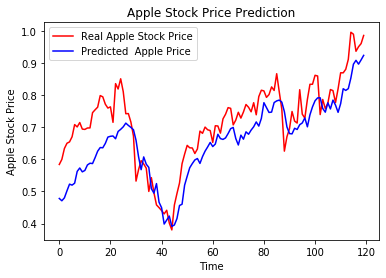

In [26]:
#Plotting pedicted vs actual price to see if trend is captured
import matplotlib.pyplot as plt

plt.plot(y_test, color = 'red', label = 'Real Apple Stock Price')
plt.plot(y_pred, color = 'blue', label = 'Predicted  Apple Price')
plt.title('Apple Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Apple Stock Price')
plt.legend()
plt.show()

In [19]:
# model1 = tf.keras.Sequential()
# model1.add(tf.keras.layers.LSTM(20, input_shape=(data_train.shape[1], 1), return_sequences=True))
# model1.add(tf.keras.layers.LSTM(20))
# model1.add(tf.keras.layers.Dense(1, activation=tf.nn.relu))
# model1.add(tf.keras.layers.Dense(1, activation=tf.nn.relu))



# model1.compile(optimizer="adam", loss="mean_squared_error")

# model1.input_shape



# Initialising the RNN
regressor = tf.keras.Sequential()

# Adding the first LSTM layer and some Dropout regularisation
regressor.add(tf.keras.layers.LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(tf.keras.layers.Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(tf.keras.layers.LSTM(units = 50, return_sequences = True))
regressor.add(tf.keras.layers.Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(tf.keras.layers.LSTM(units = 50, return_sequences = True))
regressor.add(tf.keras.layers.Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(tf.keras.layers.LSTM(units = 50, return_sequences = True))
regressor.add(tf.keras.layers.Dropout(0.2))

# Adding a fifth LSTM layer and some Dropout regularisation
regressor.add(tf.keras.layers.LSTM(units = 50, return_sequences = True))
regressor.add(tf.keras.layers.Dropout(0.2))

# Adding a sixth LSTM layer and some Dropout regularisation
regressor.add(tf.keras.layers.LSTM(units = 50))
regressor.add(tf.keras.layers.Dropout(0.2))

# Adding the output layer
regressor.add(tf.keras.layers.Dense(units = 1))


# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [20]:
X_train_re = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))


In [21]:
regressor.fit(X_train_re, y_train, epochs=100,batch_size = 32)

Train on 1198 samples
Epoch 1/100
1198/1198 [==============================] - 17s 14ms/sample - loss: 0.0277
Epoch 2/100
1198/1198 [==============================] - 7s 6ms/sample - loss: 0.0060
Epoch 3/100
1198/1198 [==============================] - 7s 6ms/sample - loss: 0.0061
Epoch 4/100
1198/1198 [==============================] - 6s 5ms/sample - loss: 0.0054
Epoch 5/100
1198/1198 [==============================] - 6s 5ms/sample - loss: 0.0045
Epoch 6/100
1198/1198 [==============================] - 6s 5ms/sample - loss: 0.0045
Epoch 7/100
1198/1198 [==============================] - 6s 5ms/sample - loss: 0.0053
Epoch 8/100
1198/1198 [==============================] - 7s 6ms/sample - loss: 0.0041
Epoch 9/100
1198/1198 [==============================] - 6s 5ms/sample - loss: 0.0043
Epoch 10/100
1198/1198 [==============================] - 6s 5ms/sample - loss: 0.0039
Epoch 11/100
1198/1198 [==============================] - 6s 5ms/sample - loss: 0.0044
Epoch 12/100
1198/1198 [====

In [27]:
X_test_re = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))


In [28]:
regressor.evaluate(X_test_re, y_test)
# print(sc)
yY_pred = regressor.predict(X_test_re)
# yY_pred = sc.inverse_transform(yY_pred)
# y_pred = sc.inverse_transform(y_pred)
# y_test = sc.inverse_transform(y_test)


120/1 [=================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

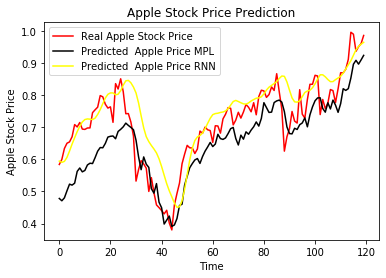

In [29]:
#Plotting predicted vs actual price to see if trend is captured

import matplotlib.pyplot as plt

plt.plot(y_test, color = 'red', label = 'Real Apple Stock Price')
plt.plot(y_pred, color = 'black', label = 'Predicted  Apple Price MPL')
plt.plot(yY_pred, color = 'yellow', label = 'Predicted  Apple Price RNN')

plt.title('Apple Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Apple Stock Price')
plt.legend()
plt.show()